In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import os
import cv2
from tqdm import tqdm
import random


In [10]:
DATADIR = 'C:/Users/Booshan/Desktop/3.Sign Language to Text Conversion/data/train'

CATEGORIES = ["A","B","C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N","nothing",  "O", "P", "Q", "R", "S",  "T", "U", "V", "W", "X", "Y", "Z"]

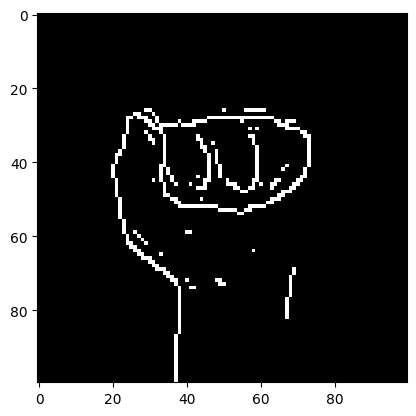

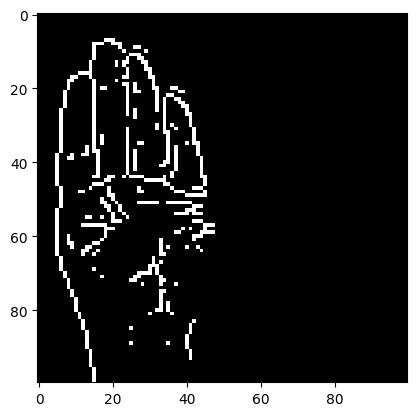

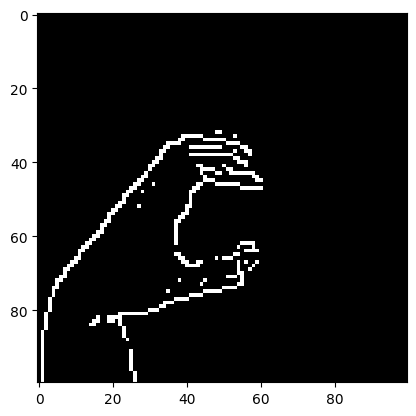

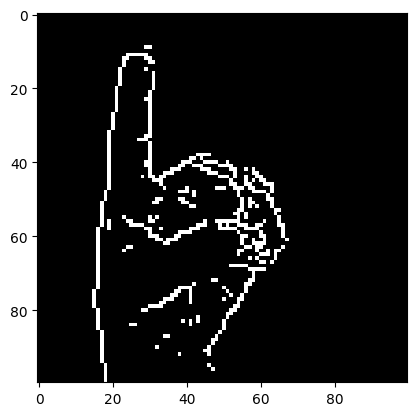

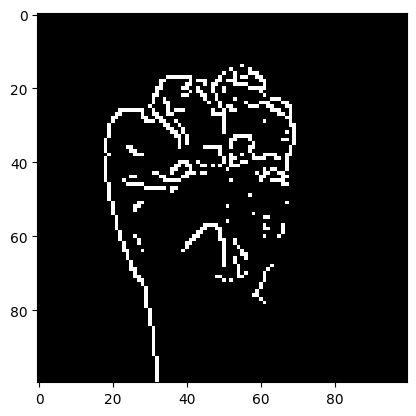

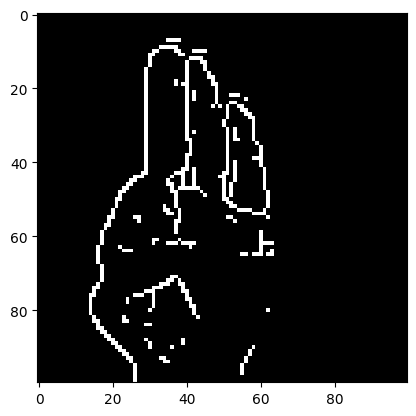

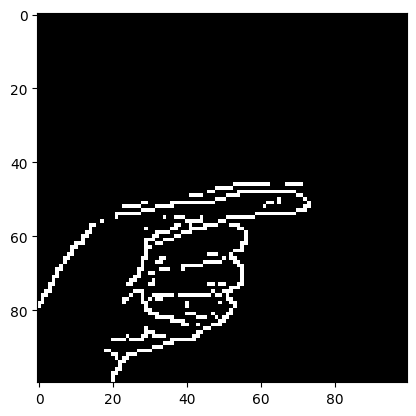

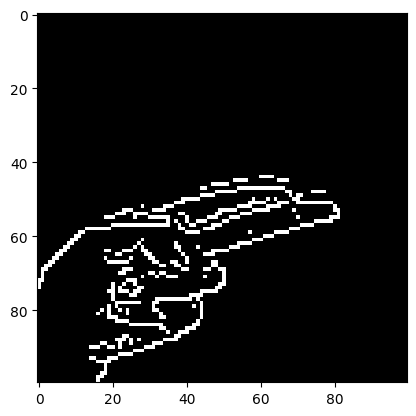

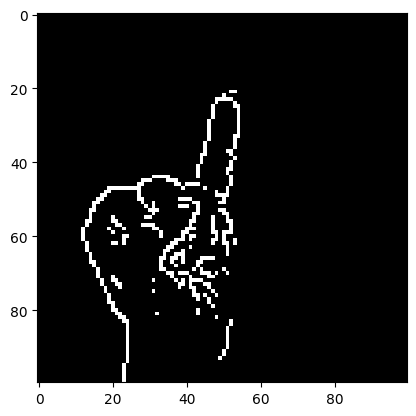

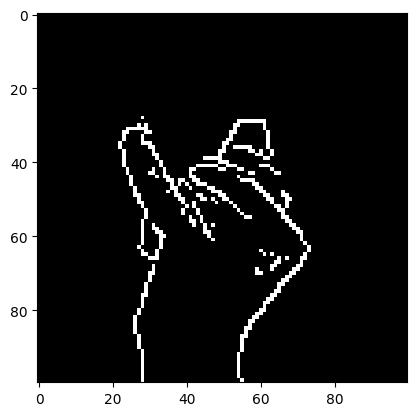

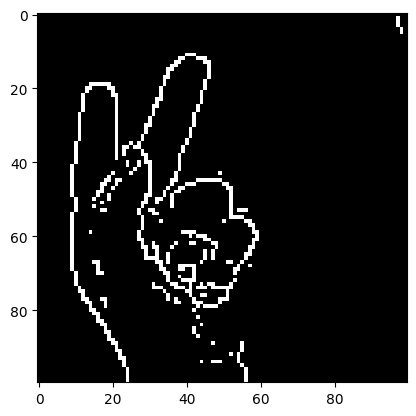

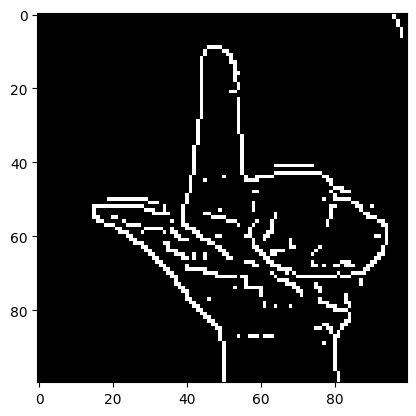

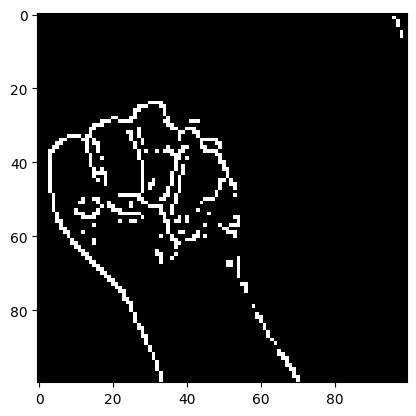

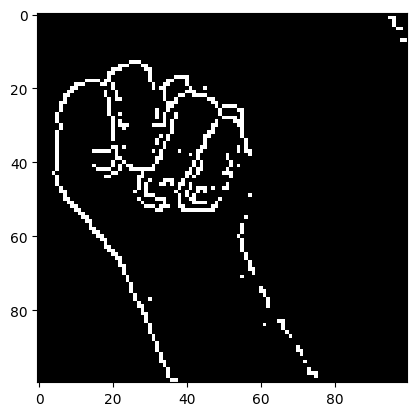

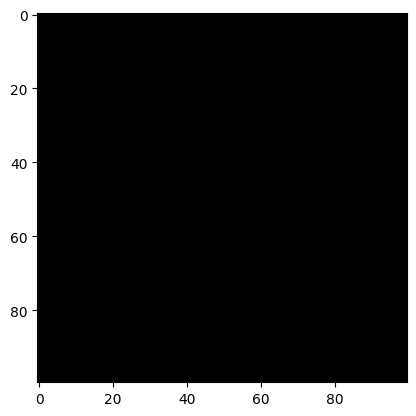

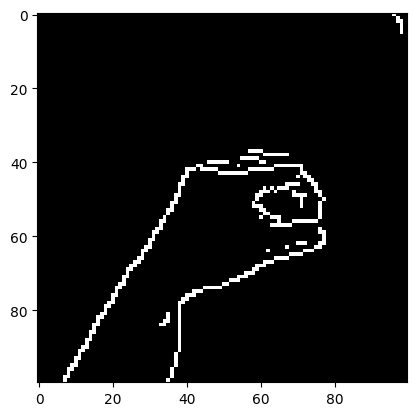

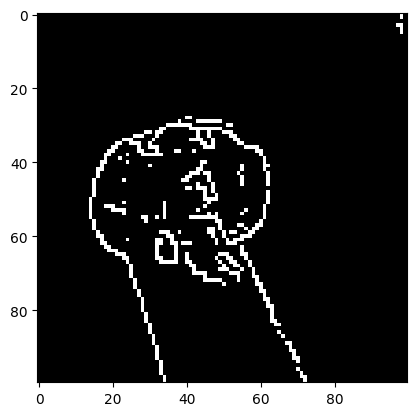

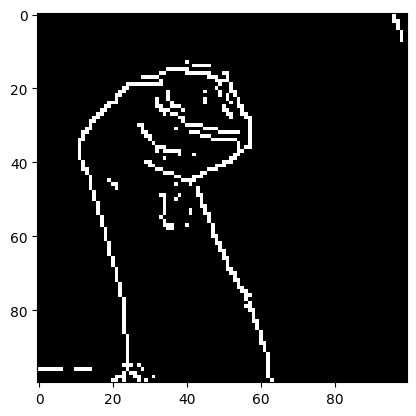

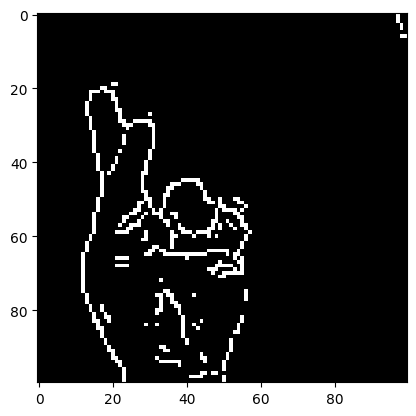

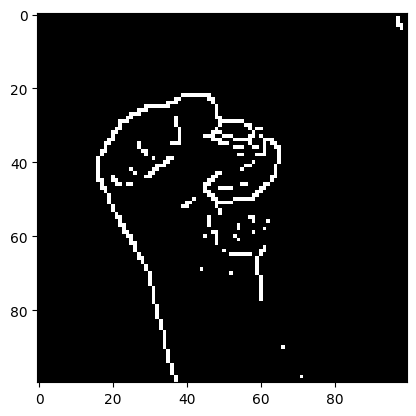

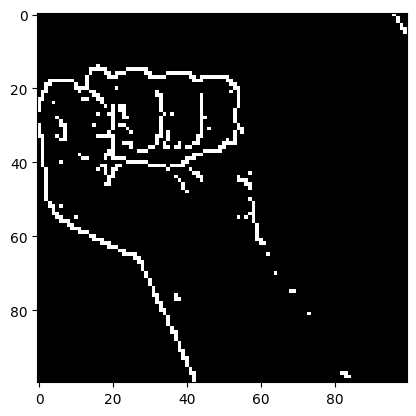

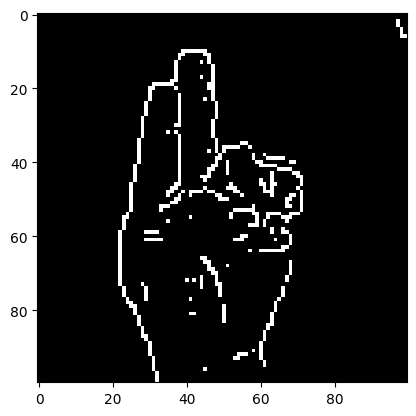

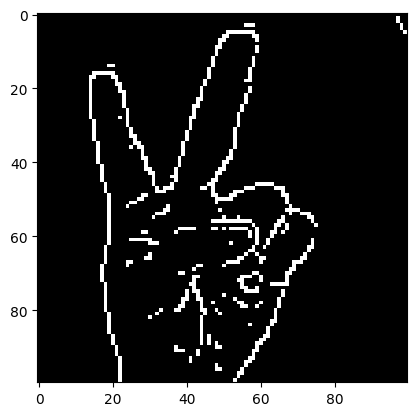

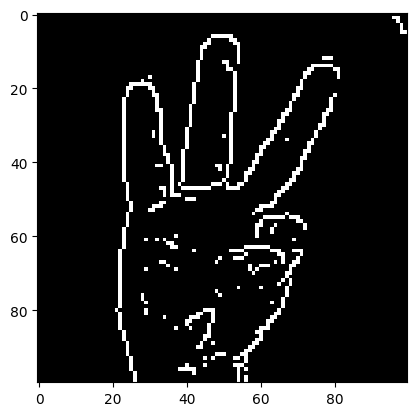

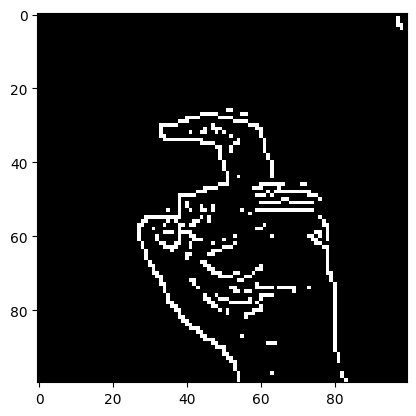

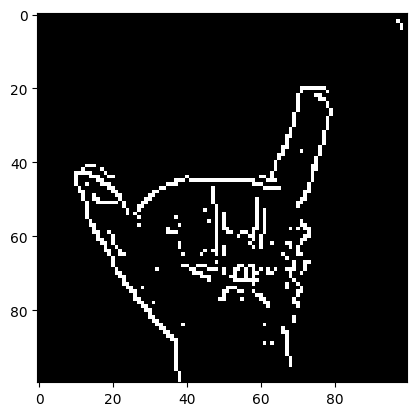

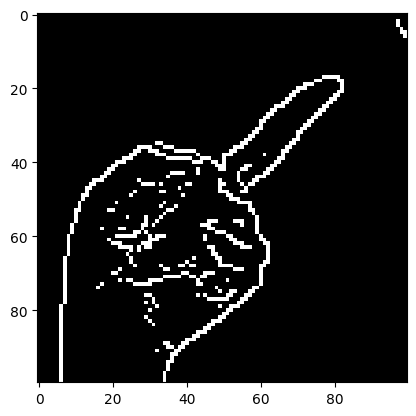

In [11]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in (os.listdir(path)):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (100, 100))  # resize to normalize data size
        new_array = cv2.Canny(new_array,80,80)
        plt.imshow(new_array,cmap = 'gray')
        plt.show()
        break

In [12]:
training_data = []
IMG_SIZE = 100
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array = cv2.Canny(new_array,80,80)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 400/400 [00:06<00:00, 59.42it/s]

10800


In [13]:
random.shuffle(training_data)

In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
DATADIR = 'C:/Users/Booshan/Desktop/3.Sign Language to Text Conversion/data/test'

CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N","nothing",  "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

testing_data = []

def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array1 = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array1 = cv2.Canny(new_array1,80,80)
                testing_data.append([new_array1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

print(len(testing_data))

 15%|█▌        | 6/40 [00:00<00:00, 55.70it/s]

100%|██████████| 40/40 [00:00<00:00, 65.00it/s]

1080


In [16]:
random.shuffle(testing_data)

In [17]:
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
X = X/255.0
X.shape

(10800, 100, 100, 1)

In [19]:
X_t = X_test/255.0
X_t.shape

(1080, 100, 100, 1)

In [20]:
X = np.array(X)
y = np.array(y)
X_t = np.array(X_t)
y_t = np.array(y_test)

In [21]:
x_train = X.reshape(-1, 100, 100, 1)
x_test = X_t.reshape(-1, 100, 100, 1)

In [22]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import layers
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(100,100,1)),
   keras.layers.Conv2D(128, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Conv2D(16, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(27, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.fit(x_train,y,validation_data= (x_test,y_t),epochs= 20, batch_size=64)




Epoch 1/20
149/169 [=========================>....] - ETA: 9s - loss: 1.1391 - accuracy: 0.7164 

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_t)

34/34 [==============================] - 1s 36ms/step - loss: 3.1591 - accuracy: 0.6250


[3.1591038703918457, 0.625]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_2 (Average (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)       1280      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        36896     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)             

In [ ]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save\assets
